# 서울특별시 공공자전거 이용정보 데이터 분석

* 사용 데이터 : 서울특별시 공공자전거 이용정보(월별)
* 데이터 측정 기간 : 2024년 7월 ~ 12월

In [2]:
import numpy as np
import pandas as pd

## 1. 데이터 불러오기

In [2]:
data = pd.read_csv("data\서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="CP949")
data

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


## 2. 데이터 정보 확인

In [3]:
data.shape

(619664, 11)

In [4]:
data.columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


In [6]:
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6


In [7]:
new_data = data.astype({"대여소번호":"object"})
new_data.dtypes

대여일자         int64
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

In [8]:
data["대여구분코드"].unique()

array(['일일권', '일일권(비회원)', '정기권'], dtype=object)

In [9]:
new_data.head

<bound method NDFrame.head of           대여일자 대여소번호                   대여소명 대여구분코드   성별 연령대코드  이용건수      운동량  \
0       202407   102        102. 망원역 1번출구 앞    일일권  NaN   20대    67  4304.28   
1       202407   102        102. 망원역 1번출구 앞    일일권  NaN   30대    64  4142.09   
2       202407   102        102. 망원역 1번출구 앞    일일권  NaN   40대     2   265.91   
3       202407   102        102. 망원역 1번출구 앞    일일권  NaN   50대     6   648.52   
4       202407   102        102. 망원역 1번출구 앞    일일권  NaN   60대     1    35.37   
...        ...   ...                    ...    ...  ...   ...   ...      ...   
619659  202412  6178  6178. 마스터밸류에이스 지식산업센터    정기권    M   40대    55  2964.38   
619660  202412  6178  6178. 마스터밸류에이스 지식산업센터    정기권    M   50대    10   327.38   
619661  202412  6178  6178. 마스터밸류에이스 지식산업센터    정기권    M   60대     1    14.37   
619662  202412  6178  6178. 마스터밸류에이스 지식산업센터    정기권    M  ~10대     7   249.95   
619663  202412  6178  6178. 마스터밸류에이스 지식산업센터    정기권    M    기타     6   135.89   

         

In [10]:
# 월별 대여구분코드별 이용건수
sub_data_month = new_data.groupby(["대여일자", "대여구분코드"])["이용건수"].sum()
sub_data_month

대여일자    대여구분코드  
202407  일일권          514915
        일일권(비회원)      27114
        정기권         3181204
202408  일일권          592299
        일일권(비회원)      29060
        정기권         3376975
202409  일일권          764814
        일일권(비회원)      37993
        정기권         3447956
202410  일일권          818463
        일일권(비회원)      41759
        정기권         3826531
202411  일일권          499831
        일일권(비회원)      23644
        정기권         2975722
202412  일일권          238194
        일일권(비회원)      10304
        정기권         2029597
Name: 이용건수, dtype: int64

In [11]:
# 대여소별 대여구분코드별 이용건수
sub_data_rent = new_data.groupby(["대여소명", "대여구분코드"])["이용건수"].sum()
print(sub_data_rent)

대여소명                       대여구분코드  
1001. 광진교 남단 사거리(천호공원 방면)  일일권          1973
                           일일권(비회원)       96
                           정기권          7693
1002. 해공공원(천호동)            일일권          2641
                           일일권(비회원)      106
                                       ...  
995.은평다목적체육관               일일권(비회원)       22
                           정기권          2218
996.응암역2번출구 국민은행 앞         일일권          3569
                           일일권(비회원)      127
                           정기권         18478
Name: 이용건수, Length: 8331, dtype: int64


## 3. 데이터 시각화

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 월별 대여구분코드별 이용건수

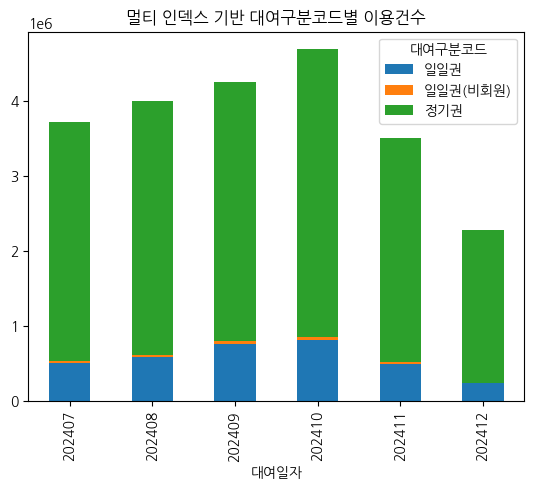

In [13]:
pivoted = sub_data_month.unstack(level="대여구분코드")
pivoted.plot(kind="bar", stacked=True)
plt.title("멀티 인덱스 기반 대여구분코드별 이용건수")
plt.show()


### 대여소별 대여구분코드별 이용건수

#### 인덱스 리셋


In [14]:
rent_data = sub_data_rent.reset_index()
rent_data.head()

,대여소명,대여구분코드,이용건수
0,1001. 광진교 남단 사거리(천호공원 방면),일일권,1973
1,1001. 광진교 남단 사거리(천호공원 방면),일일권(비회원),96
2,1001. 광진교 남단 사거리(천호공원 방면),정기권,7693
3,1002. 해공공원(천호동),일일권,2641
4,1002. 해공공원(천호동),일일권(비회원),106


In [15]:
table = rent_data.pivot_table(index="대여소명", columns="대여구분코드", values="이용건수", fill_value=0)
print(table)


대여구분코드                        일일권  일일권(비회원)      정기권
대여소명                                                
1001. 광진교 남단 사거리(천호공원 방면)  1973.0      96.0   7693.0
1002. 해공공원(천호동)            2641.0     106.0  12575.0
1003. 해공도서관앞               1079.0      24.0   6282.0
1004. 삼성광나루아파트 버스정류장       2130.0      92.0   8246.0
1006. 롯데캐슬 115동앞            225.0       8.0   1307.0
...                           ...       ...      ...
992.북한산입구 정류장               341.0      33.0    619.0
993.은평뉴타운 은뜨락아파트앞           386.0      17.0   1694.0
994.북한산생태공원입구(교통섬)          152.0       6.0   1481.0
995.은평다목적체육관                304.0      22.0   2218.0
996.응암역2번출구 국민은행 앞         3569.0     127.0  18478.0

[2785 rows x 3 columns]


In [16]:
table = table.reset_index()
table

대여구분코드,대여소명,일일권,일일권(비회원),정기권
0,1001. 광진교 남단 사거리(천호공원 방면),1973.0,96.0,7693.0
1,1002. 해공공원(천호동),2641.0,106.0,12575.0
2,1003. 해공도서관앞,1079.0,24.0,6282.0
3,1004. 삼성광나루아파트 버스정류장,2130.0,92.0,8246.0
4,1006. 롯데캐슬 115동앞,225.0,8.0,1307.0
...,...,...,...,...
2780,992.북한산입구 정류장,341.0,33.0,619.0
2781,993.은평뉴타운 은뜨락아파트앞,386.0,17.0,1694.0
2782,994.북한산생태공원입구(교통섬),152.0,6.0,1481.0
2783,995.은평다목적체육관,304.0,22.0,2218.0


In [17]:
table1 = table[["대여소명", "일일권"]]
table1

대여구분코드,대여소명,일일권
0,1001. 광진교 남단 사거리(천호공원 방면),1973.0
1,1002. 해공공원(천호동),2641.0
2,1003. 해공도서관앞,1079.0
3,1004. 삼성광나루아파트 버스정류장,2130.0
4,1006. 롯데캐슬 115동앞,225.0
...,...,...
2780,992.북한산입구 정류장,341.0
2781,993.은평뉴타운 은뜨락아파트앞,386.0
2782,994.북한산생태공원입구(교통섬),152.0
2783,995.은평다목적체육관,304.0


In [18]:
table1 = table1.sort_values(by="일일권", ascending=False)[:20]
table1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1829 to 1200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소명    20 non-null     object 
 1   일일권     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


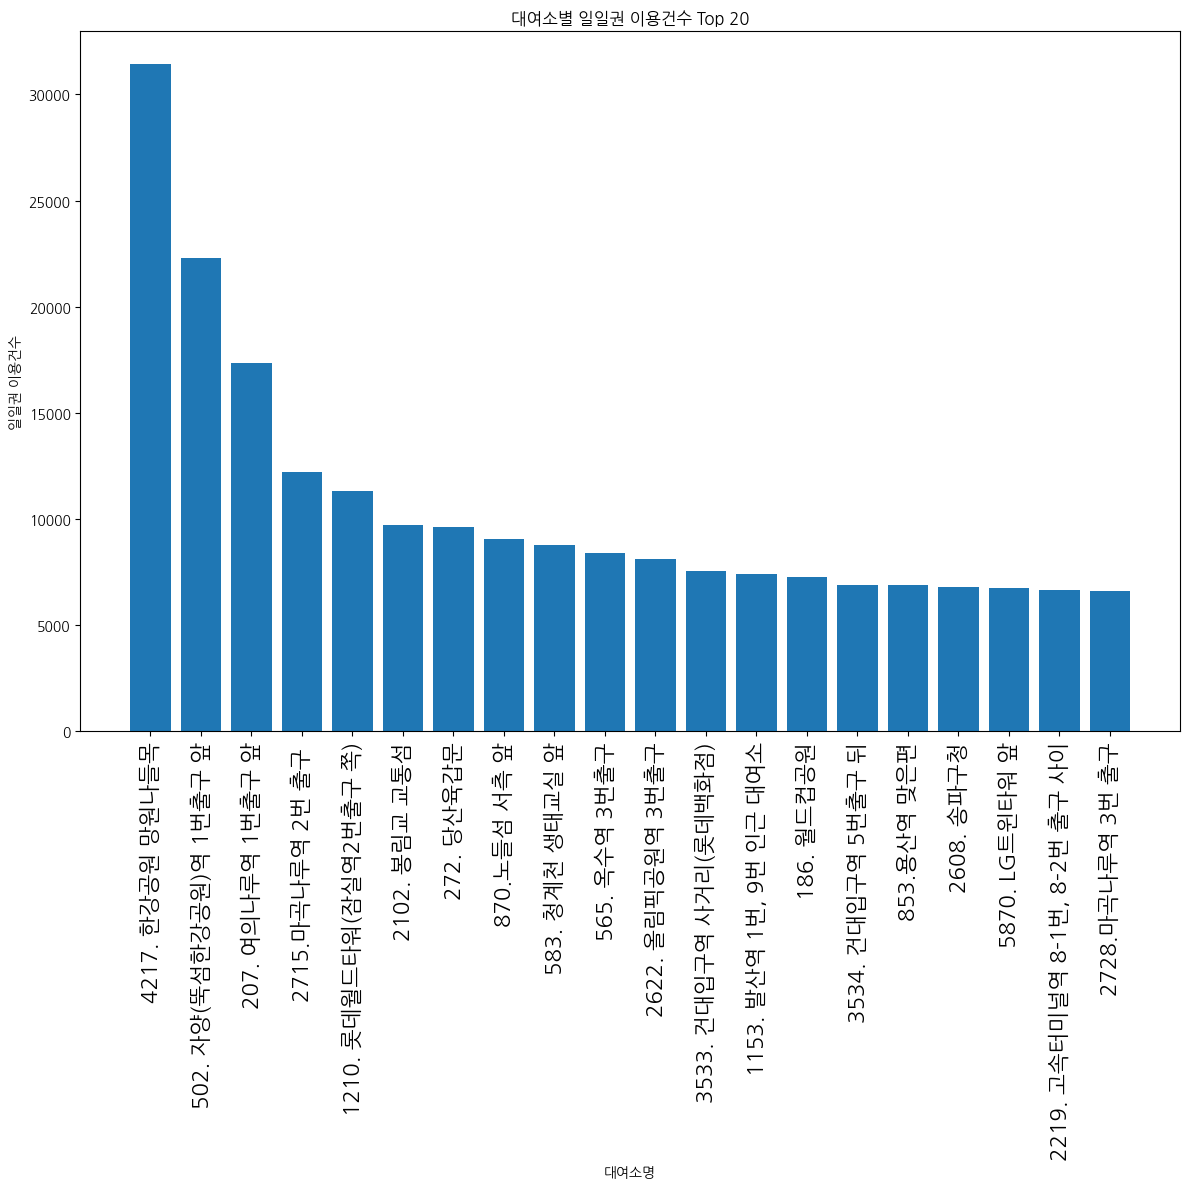

In [27]:
plt.figure(figsize=(12, 12))
plt.bar(table1["대여소명"], table1["일일권"])
plt.xlabel("대여소명")
plt.ylabel("일일권 이용건수")
plt.title("대여소별 일일권 이용건수 Top 20")
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
table2 = table[["대여소명", "정기권"]]
table2

대여구분코드,대여소명,정기권
0,1001. 광진교 남단 사거리(천호공원 방면),7693.0
1,1002. 해공공원(천호동),12575.0
2,1003. 해공도서관앞,6282.0
3,1004. 삼성광나루아파트 버스정류장,8246.0
4,1006. 롯데캐슬 115동앞,1307.0
...,...,...
2780,992.북한산입구 정류장,619.0
2781,993.은평뉴타운 은뜨락아파트앞,1694.0
2782,994.북한산생태공원입구(교통섬),1481.0
2783,995.은평다목적체육관,2218.0


In [21]:
table2 = table2.sort_values(by="정기권", ascending=False)[:20]
table2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1188 to 2640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소명    20 non-null     object 
 1   정기권     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


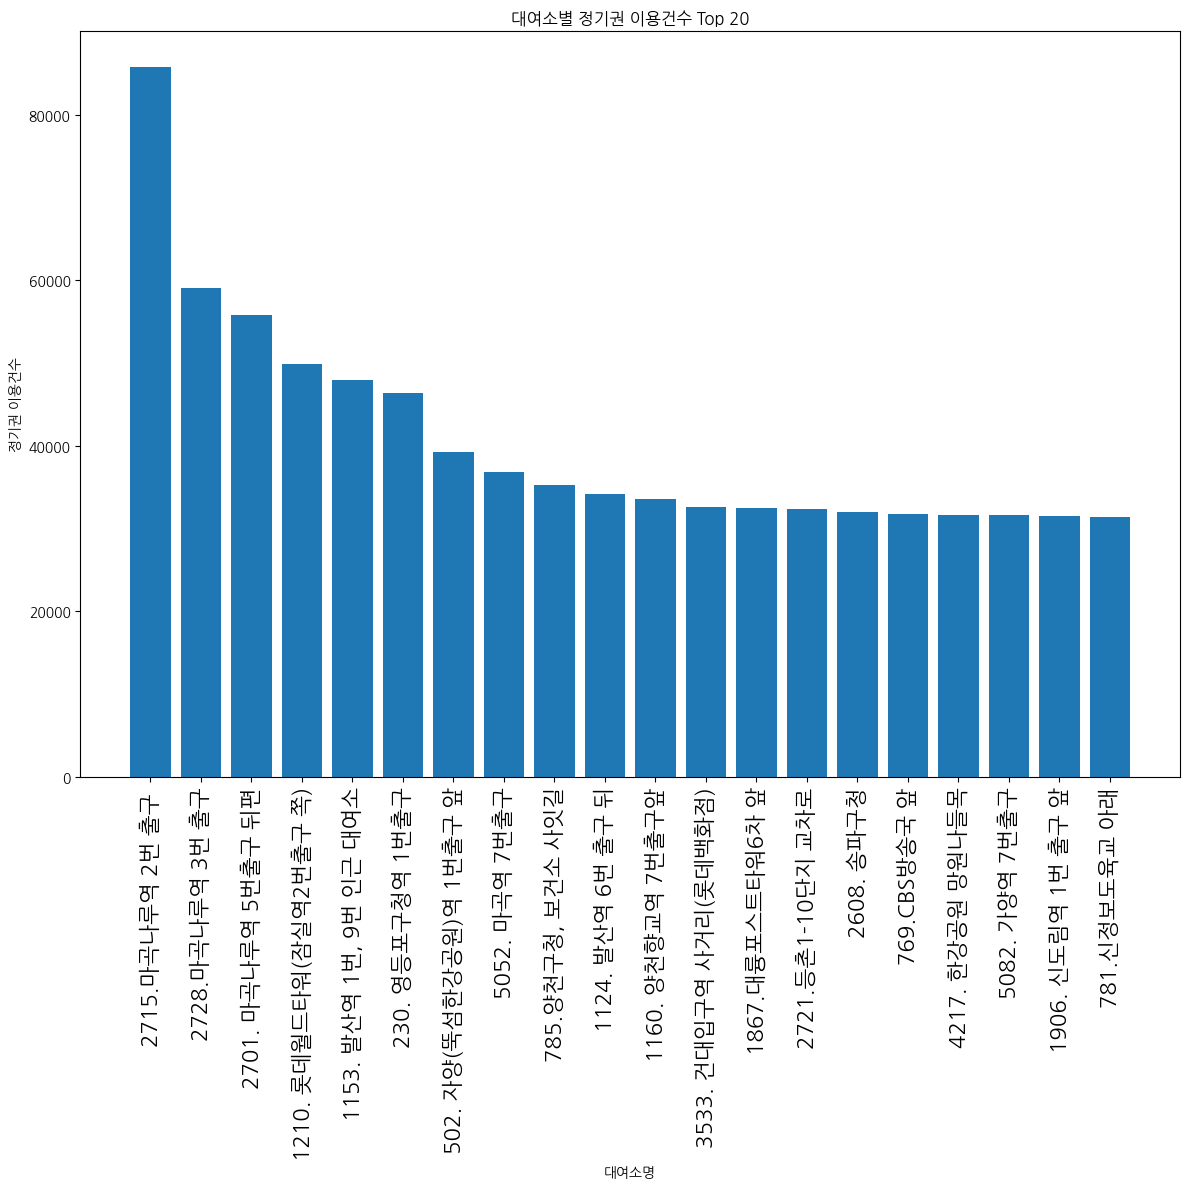

In [22]:
plt.figure(figsize=(12, 12))
plt.bar(table2["대여소명"], table2["정기권"])
plt.xlabel("대여소명")
plt.ylabel("정기권 이용건수")
plt.title("대여소별 정기권 이용건수 Top 20")
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
table3 = table[["대여소명", "일일권(비회원)"]]
table3

대여구분코드,대여소명,일일권(비회원)
0,1001. 광진교 남단 사거리(천호공원 방면),96.0
1,1002. 해공공원(천호동),106.0
2,1003. 해공도서관앞,24.0
3,1004. 삼성광나루아파트 버스정류장,92.0
4,1006. 롯데캐슬 115동앞,8.0
...,...,...
2780,992.북한산입구 정류장,33.0
2781,993.은평뉴타운 은뜨락아파트앞,17.0
2782,994.북한산생태공원입구(교통섬),6.0
2783,995.은평다목적체육관,22.0


In [24]:
table3 = table3.sort_values(by="일일권(비회원)", ascending=False)[:20]
table3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1829 to 1125
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소명      20 non-null     object 
 1   일일권(비회원)  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


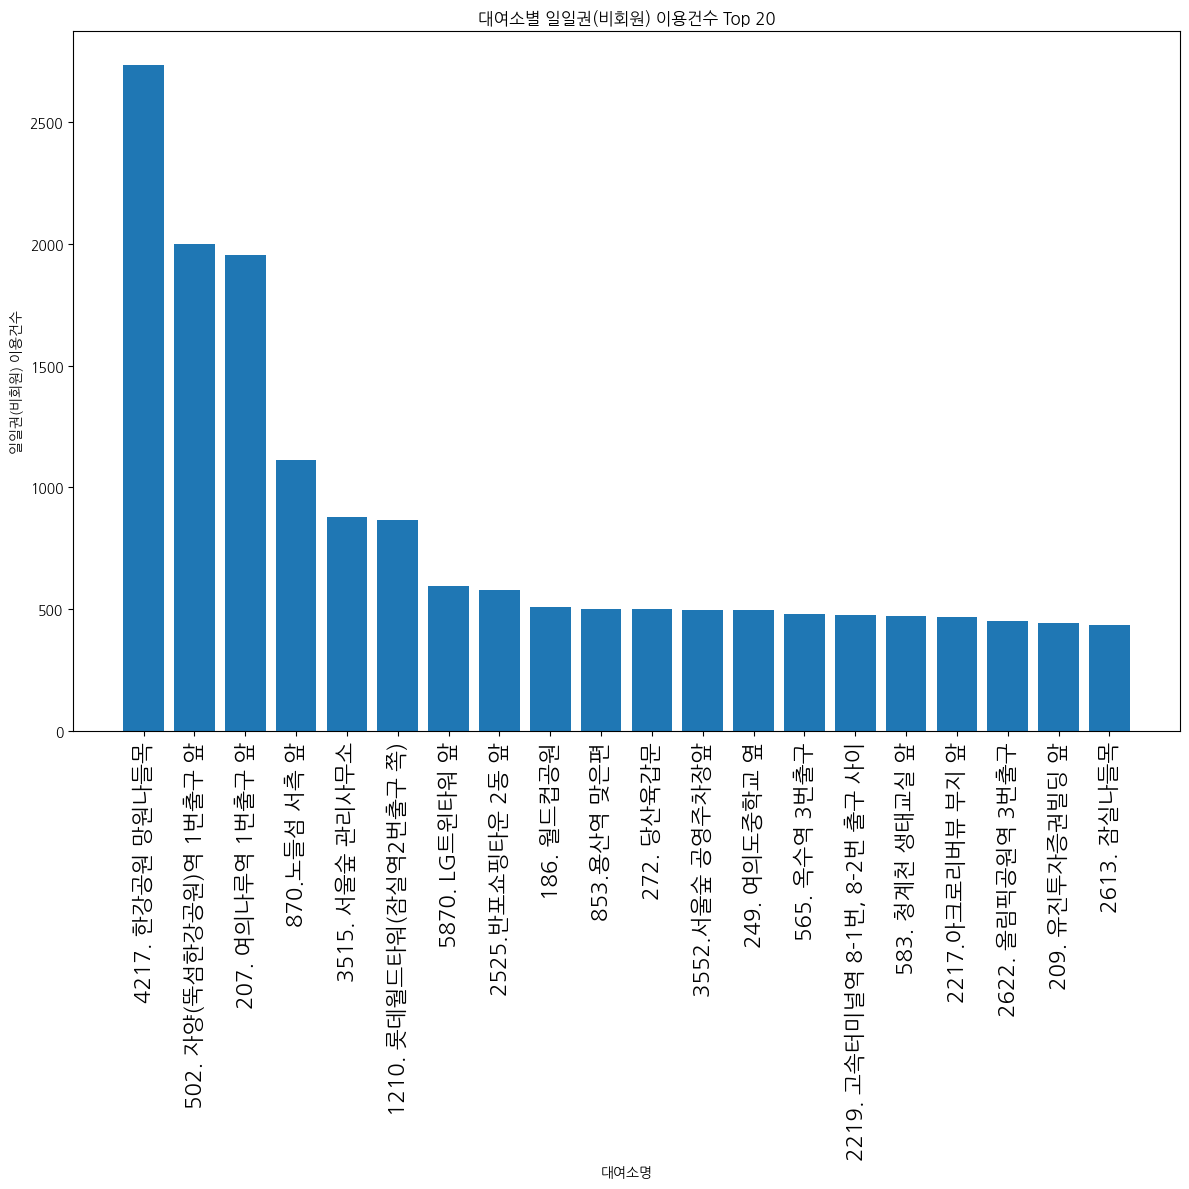

In [25]:
plt.figure(figsize=(12, 12))
plt.bar(table3["대여소명"], table3["일일권(비회원)"])
plt.xlabel("대여소명")
plt.ylabel("일일권(비회원) 이용건수")
plt.title("대여소별 일일권(비회원) 이용건수 Top 20")
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.show()